<a href="https://colab.research.google.com/github/jeffheaton/app_deep_learning/blob/main/t81_558_class_13_4_tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 13: Advanced/Other Topics**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 13 Video Material

* Part 13.1: Using Denoising AutoEncoders [[Video]](https://www.youtube.com/watch?v=BBrRD89sTk8&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_13_1_auto_encode.ipynb)
* Part 13.2: Anomaly Detection [[Video]](https://www.youtube.com/watch?v=wubZ516TkI8&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_13_2_anomaly.ipynb)
* Part 13.3: Model Drift and Retraining [[Video]](https://www.youtube.com/watch?v=F4395B1ySpg&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_13_3_retrain.ipynb)
* **Part 13.4: Tensor Processing Units (TPUs)** [[Video]](https://www.youtube.com/watch?v=Cp3xOyxOZNo&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_13_4_tpu.ipynb)
* Part 13.5: Future Directions in Artificial Intelligence [[Video]](https://www.youtube.com/watch?v=RjxvEZh73Yc&list=PLjy4p-07OYzuy_lHcRW8lPTLPTTOmUpmi) [[Notebook]](t81_558_class_13_5_new_tech.ipynb)



# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
# Detect Colab if present
try:
    from google.colab import drive
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


# Part 13.4: Tensor Processing Units (TPUs)

This book focuses primarily on NVIDIA Graphics Processing Units (GPUs) for deep learning acceleration. NVIDIA GPUs are not the only option for deep learning acceleration. TensorFlow continues to gain additional support for AMD and Intel GPUs. TPUs are also available from Google cloud platforms to accelerate deep learning. The focus of this book and course is on NVIDIA GPUs because of their wide availability on both local and cloud systems.

Though this book focuses on NVIDIA GPUs, we will briefly examine Google Tensor Processing Units (TPUs). These devices are an AI accelerator Application-Specific Integrated Circuit (ASIC) developed by Google. They were designed specifically for neural network machine learning, mainly using Google's TensorFlow software. Google began using TPUs internally in 2015 and in 2018 made them available for third-party use, both as part of its cloud infrastructure and by offering a smaller version of the chip for sale.

The full use of a TPU is a complex topic that I only introduced in this part. Supporting TPUs is slightly more complicated than GPUs because specialized coding is needed. Changes are rarely required to adapt CPU code to GPU for most relatively simple mainstream GPU tasks in PyTorch. I will cover the mild code changes needed to utilize in this part. You might also want to refer to the [CoLab PyTorch TPU guide](https://colab.research.google.com/github/pytorch/xla/blob/master/contrib/colab/getting-started.ipynb#scrollTo=OApBOAe1fpH_) provided by Google.

We will begin by checking the environment to see if a TPU is present.


In [2]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

If a TPU is not detected follow the instructions and select a TPU hardware accelerator. Next, we will install the necessary software into CoLab to allow TPU access.

In [3]:
!pip install cloud-tpu-client==0.10 torch==2.0.0 torchvision==0.15.1 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.0-cp310-cp310-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

Please note, once the above code runs in CoLab, it will request you to restart the environment before continuing. Please follow these instructions, you likely are provided with a "RESTART RUNTIME" button.

Next, we will query to see if we have TPUs available.

In [1]:
import torch_xla.core.xla_model as xm
tpu_cores = xm.get_xla_supported_devices()
print("TPU Cores Available:", tpu_cores)

TPU Cores Available: ['xla:1', 'xla:2', 'xla:3', 'xla:4', 'xla:5', 'xla:6', 'xla:7', 'xla:8']


It is typical in Google CoLab to have 8 TPUs; this is roughly analogous to multiple GPUs, and, unfortunately, requires some of the same coordination in code. I will use just a single TPU core, which is plug-and-play compatible with most of the software in this book.

In [5]:
# Creates a random tensor on xla:1 (a Cloud TPU core)
device = xm.xla_device()
print(f"Device: {device}")

Device: xla:1


Now that the device is set, we can use the TPU core just like we would a GPU or Apple MPS. Overall, I've found CUDA to be the most compatible/capable, followed by TPS, and lastly MPS. Though, I MPS is adding features all the time. We will begin by looking at the simple Neural Network example [provied by PyTorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Simple example network from
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


# Places network on the default TPU core
net = Net().to(device)

# Creates random input on the default TPU core
input = torch.randn(1, 1, 32, 32, device=device)

# Runs network
out = net(input)
print(out)

tensor([[ 0.1263, -0.0300, -0.1846,  0.1202, -0.1197,  0.0876, -0.0388,  0.0518,
          0.0542,  0.0563]], device='xla:1', grad_fn=<AddmmBackward0>)


This code defines and utilizes a simple convolutional neural network (CNN) using PyTorch, a popular machine learning library in Python. The CNN, named Net, is a subclass of torch.nn.Module, which is the base class for all neural network modules in PyTorch.

Key components and operations of the Net class are:

1. Initialization (__init__): This method initializes two convolutional layers (conv1 and conv2) and three fully connected (linear) layers (fc1, fc2, and fc3). The convolutional layers are used for extracting features from the input image, and the linear layers are used for classification tasks.

2. Forward Propagation (forward): This method defines the forward pass of the network. It applies a sequence of operations on the input tensor x:

3. Convolution followed by ReLU activation and max pooling is performed twice, first with conv1 and then with conv2.
The output is then flattened (transformed from a multi-dimensional tensor into a 1D tensor).
T
his flattened tensor is passed through three linear layers with ReLU activation functions (except for the last linear layer).
Flattening (num_flat_features): This method calculates the total number of features in a flattened tensor, which is needed to determine the input size for the first linear layer.

After defining the Net class, the code creates an instance of this network and moves it to a specific device (dev), which could be a CPU, GPU, or TPU, depending on how dev is defined. It then creates a random input tensor mimicking an image of size 32x32 with 1 channel (e.g., grayscale) and runs this input through the network (net(input)). The output of the network is then printed, which typically represents the class scores for a classification task.

This code is a classic example of defining and using a CNN in PyTorch for tasks like image classification.

## Mandelbrot Set

Earlier in this book, I provided code to calculate the Mandelbrot set on either CPU or CUDA. Currently, the Mac MPS does not support complex numbers and, as a result, cannot run the Mandelbrot Set example. Here, I present the same code from Module 3, with no changes. Setting the device is sufficient to run this example.

In [7]:
from io import BytesIO
import torch
import numpy as np
import PIL.Image
from IPython.display import Image


# Take a NumPy array and render it as a Mandelbrot.
def render(a):
    a_cyclic = (a * 0.3).reshape(list(a.shape) + [1])
    img = np.concatenate(
        [
            10 + 20 * np.cos(a_cyclic),
            30 + 50 * np.sin(a_cyclic),
            155 - 80 * np.cos(a_cyclic),
        ],
        2,
    )
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    return PIL.Image.fromarray(a)


# Loop through the render cycles for. Mandlebrot plot.
def mandelbrot_helper(grid_c, current_values, counts, cycles):
    for i in range(cycles):
        # The Mandlebrot formula
        temp = current_values * current_values + grid_c
        not_diverged = torch.abs(temp) < 4
        current_values.copy_(temp)
        counts.copy_(torch.add(counts, not_diverged.double()))


# Render a Mandelbrot plot at the specified location, zoom, and render cycles.
def mandelbrot(render_size, center, zoom, cycles):
    f = zoom / render_size[0]

    real_start = center[1] - (render_size[1] / 2) * f
    real_end = real_start + render_size[1] * f
    imag_start = center[0] - (render_size[0] / 2) * f
    imag_end = imag_start + render_size[0] * f

    real_range = torch.arange(
        real_start, real_end, f, dtype=torch.float32, device=device
    )
    imag_range = torch.arange(
        imag_start, imag_end, f, dtype=torch.float32, device=device
    )
    real, imag = torch.meshgrid(real_range, imag_range, indexing="ij")
    grid_c = torch.complex(imag, real)
    current_values = torch.clone(grid_c)
    counts = torch.Tensor(torch.zeros_like(grid_c, dtype=torch.float32))

    mandelbrot_helper(grid_c, current_values, counts, cycles)
    return counts.cpu().numpy()

With the support functions defined, we can now run the Mandelbrot Set example on the TPU.

(640, 480)


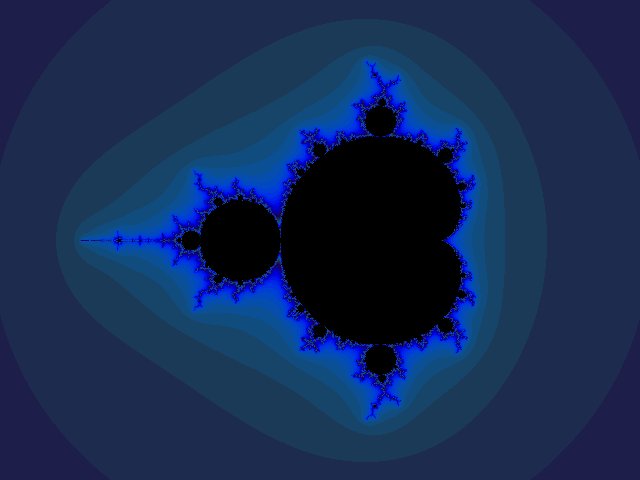

In [8]:
import os

# Pytorch does not currently support complex numbers on MPS
temp_device = device
if device == "mps":
    device = "cpu"

counts = mandelbrot(
    # render_size=(1920,1080), # HD
    render_size=(640, 480),
    center=(-0.5, 0),
    zoom=4,
    cycles=200,
)

img = render(counts)
print(img.size)

# restore device
device = temp_device

# display image
img